### Using Keras to Load Dataset

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
import matplotlib.pyplot as plt

def items_show(digit):
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

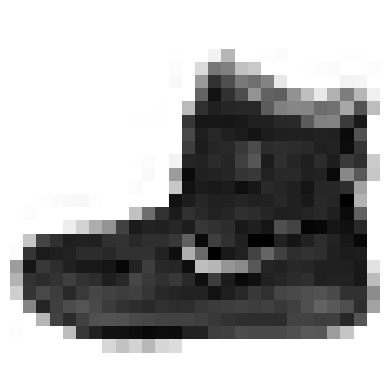

In [5]:
items_show(X_train[0])

In [6]:
X_train, X_val, X_test = X_train/255., X_val/255. , X_test/255.

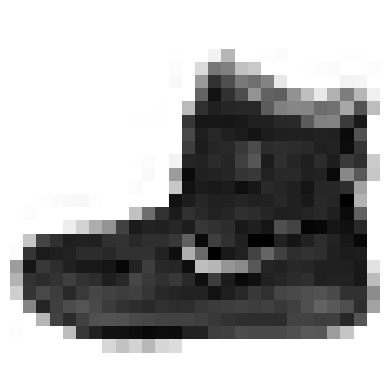

In [7]:
items_show(X_train[0])

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneker", "Bag", "Ankle Boot"]

class_names[y_train[0]]

'Ankle Boot'

### Creating The Model Using the Sequential API

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(300, activation= tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(100, activation= tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)) # we have 10 classes

### More Convinient Way to Create Sequential Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= [28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05028423, -0.06380875, -0.05699327, ..., -0.03749532,
         0.00221924, -0.03097365],
       [ 0.00701649, -0.04184904,  0.02686435, ..., -0.07115152,
         0.03286783, -0.0363193 ],
       [-0.0365348 ,  0.06459309,  0.0420631 , ..., -0.06031954,
         0.00714578, -0.0740588 ],
       ...,
       [ 0.04686884,  0.06584105,  0.00204129, ..., -0.04363061,
         0.02189475,  0.0167942 ],
       [ 0.04760427, -0.01321968,  0.02503187, ...,  0.01450756,
        -0.04784454, -0.06246827],
       [-0.04780845, -0.00354093,  0.02543791, ..., -0.00352776,
        -0.0174408 ,  0.0385818 ]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling The Model

In [16]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.sparse_categorical_accuracy
)

Here we used 'sparse_categorical_crossentropy' because we have sparse labels (e.g., target classes index are from 0 o 9).
If we had one target probability instead (e.g., one hot encoding classes) then we would have to use 'categorical_crossentropy' and for binary classification problem we would need to use 'binary_crossentropy' and 'sigmoid' instead of 'softmax'.

### Training and Evaluate The Model

In [17]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7149 - sparse_categorical_accuracy: 0.7674 - val_loss: 0.5035 - val_sparse_categorical_accuracy: 0.8298
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4817 - sparse_categorical_accuracy: 0.8327 - val_loss: 0.4544 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4360 - sparse_categorical_accuracy: 0.8465 - val_loss: 0.4223 - val_sparse_categorical_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4113 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.3954 - val_sparse_categorical_accuracy: 0.8648
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3903 - sparse_categorical_accuracy: 0.8621 - val_loss: 0.3854 - val_sparse_categorical_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3737 - spars

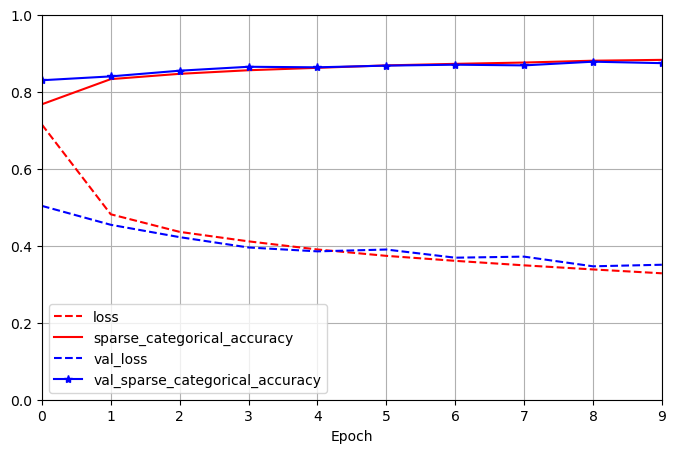

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,9], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3742 - sparse_categorical_accuracy: 0.8678


[0.374237060546875, 0.8677999973297119]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 164ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.12, 0.  , 0.79],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [23]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
np.array(class_names)[y_test[:3]]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')